<a href="https://colab.research.google.com/github/N6118/MiniMLprojects/blob/main/Gold_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbm5jMDNqOTJFb0JGcmNabWVlTGp4VnBsalZpd3xBQ3Jtc0tuUk83OTBRTVp4cURCYWtkeTFyX1pyaE9XbDczRmNPaFpoWFcyLTFtWGZDTHVncFEwRUlkOVJsdEI1ZmpHVG5obm44NHRLRlhkQlJNMXY3alR5ZHhFN2IzbnJhekhwVUhIaHNVMzlieUNVajZlRDFKUQ&q=https%3A%2F%2Fwww.kaggle.com%2Faltruistdelhite04%2Fgold-price-data&v=9ffkBvh8PTQ
data = pd.read_csv("/content/drive/MyDrive/Data Sets/gld_price_data.csv")

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
data.shape

(2290, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
correlation = data.corr()

<ipython-input-12-d9a448acd2ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

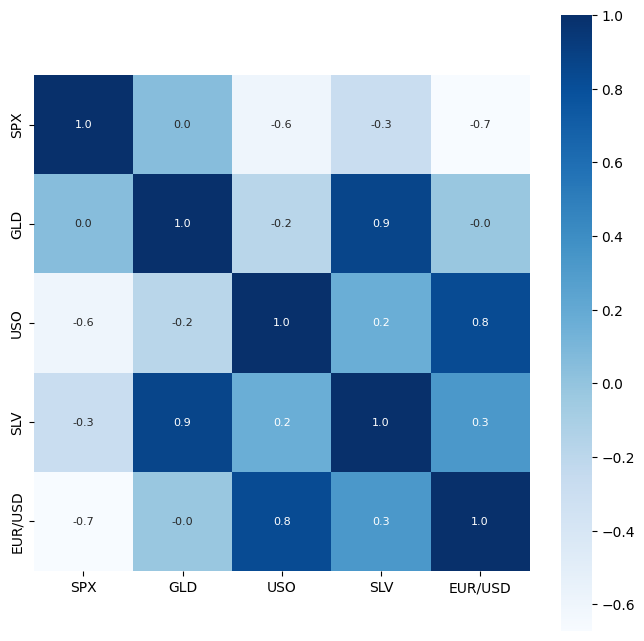

In [13]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True , square = True,fmt ='.1f', annot=True , annot_kws={'size':8},cmap="Blues")

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-16-bf8b2760eb30>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

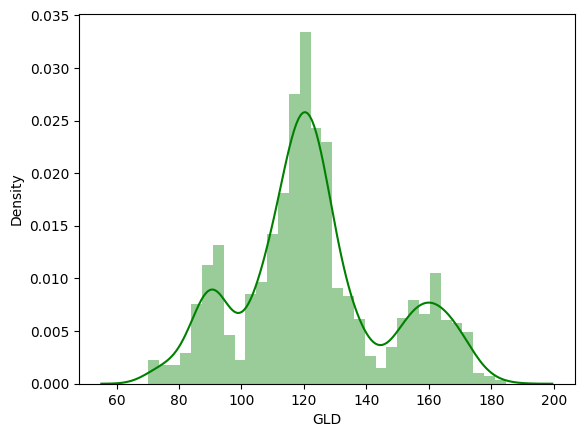

In [16]:
sns.distplot(data['GLD'], color='green')

In [17]:
X = data.drop(["Date",'GLD'], axis = 1)
Y = data["GLD"]

In [19]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.1 , random_state = 2)

In [20]:
regressor = RandomForestRegressor()

In [21]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [22]:
prediction = regressor.predict(X_test)

In [23]:
error = metrics.r2_score(Y_test,prediction)

In [25]:
print(error)

0.9884755600954312


In [26]:
Y_test = list(Y_test)

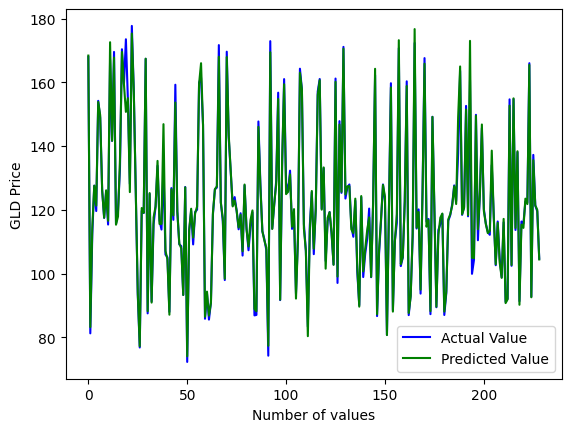

In [29]:
plt.plot(Y_test, color='blue', label = "Actual Value")
plt.plot(prediction , color = 'green', label='Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()